In [17]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
# this is used to get the plots inline i.e. in the same page
from collections import Counter

In [18]:
df=pd.read_csv("PL_XSELL.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
CUST_ID                     20000 non-null object
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null object
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null object
AGE_BKT                     20000 non-null object
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null object
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
N

In [20]:
df.describe()

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,...,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.125600,38.418150,5.113622e+05,440.150300,14.955650,125.239300,12.348050,6.63370,18.97540,1.883000,...,0.042750,0.04440,7408.839731,242236.478811,25092.478384,179059.029254,20303.920406,0.901150,0.492950,0.501933
std,0.331406,9.577985,7.235930e+05,249.887582,8.642634,54.953936,12.151921,7.67583,17.75929,2.263596,...,0.203038,0.20623,7210.168619,269837.890598,49387.197536,281706.855583,46472.889982,0.298468,0.499963,0.290762
min,0.000000,21.000000,0.000000e+00,100.000000,1.000000,29.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,0.000000,30.000000,6.475403e+04,227.000000,7.000000,79.000000,6.000000,2.00000,9.00000,1.000000,...,0.000000,0.00000,0.000000,1265.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.248187
50%,0.000000,38.000000,2.316758e+05,364.000000,15.000000,125.000000,10.000000,5.00000,14.00000,1.000000,...,0.000000,0.00000,6000.000000,147095.000000,8645.000000,0.000000,0.000000,1.000000,0.000000,0.506121
75%,0.000000,46.000000,6.538768e+05,644.000000,22.000000,172.000000,14.000000,7.00000,21.00000,2.000000,...,0.000000,0.00000,13500.000000,385000.000000,28605.000000,257699.000000,0.000000,1.000000,1.000000,0.753571
max,1.000000,55.000000,8.360431e+06,999.000000,31.000000,221.000000,75.000000,74.00000,149.00000,15.000000,...,2.000000,2.00000,25000.000000,999640.000000,537842.220000,999854.000000,199667.000000,1.000000,1.000000,0.999947


In [21]:
import seaborn as sns
corr = df.corr()
#corr.style.background_gradient().set_precision(2)
#sns.pairplot(df)

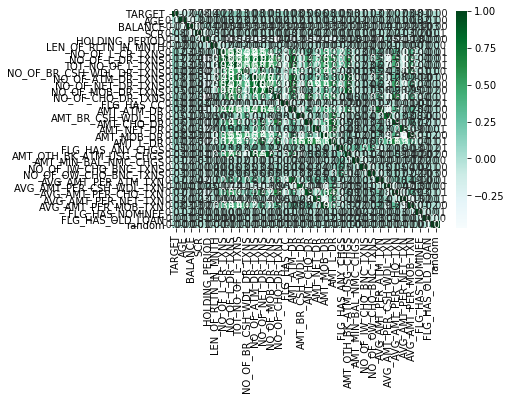

In [22]:

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap='BuGn',annot=True, fmt=".2f")

In [23]:
indices = np.where(corr >0.75)
indices = [(df.columns[x], df.columns[y]) for x, y in zip(*indices)
                                       if x != y and x < y]
indices

[('AGE_BKT', 'HOLDING_PERIOD'),
 ('SCR', 'HOLDING_PERIOD'),
 ('SCR', 'ACC_OP_DATE'),
 ('SCR', 'LEN_OF_RLTN_IN_MNTH'),
 ('SCR', 'NO_OF_L_CR_TXNS'),
 ('HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH'),
 ('ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH'),
 ('ACC_OP_DATE', 'NO_OF_L_CR_TXNS'),
 ('ACC_OP_DATE', 'AMT_BR_CSH_WDL_DR'),
 ('LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS'),
 ('NO_OF_L_CR_TXNS', 'AMT_BR_CSH_WDL_DR'),
 ('NO_OF_ATM_DR_TXNS', 'FLG_HAS_ANY_CHGS'),
 ('NO_OF_NET_DR_TXNS', 'AMT_OTH_BK_ATM_USG_CHGS'),
 ('NO_OF_MOB_DR_TXNS', 'AMT_MIN_BAL_NMC_CHGS'),
 ('NO_OF_CHQ_DR_TXNS', 'NO_OF_IW_CHQ_BNC_TXNS')]

In [24]:
df.drop(['HOLDING_PERIOD','ACC_OP_DATE','LEN_OF_RLTN_IN_MNTH','NO_OF_L_CR_TXNS','NO_OF_L_DR_TXNS','CUST_ID','random','AGE'], axis=1, inplace=True)
df.drop(['NO_OF_BR_CSH_WDL_DR_TXNS','NO_OF_ATM_DR_TXNS','NO_OF_NET_DR_TXNS','NO_OF_MOB_DR_TXNS','NO_OF_CHQ_DR_TXNS','AMT_ATM_DR','AMT_BR_CSH_WDL_DR','AMT_CHQ_DR','AMT_NET_DR','AMT_MOB_DR'], axis=1, inplace=True)

In [25]:
corrn = df.corr()
indices = np.where(corrn >0.7)
indices = [(df.columns[x], df.columns[y]) for x, y in zip(*indices)
                                       if x != y and x < y]
indices

[]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
TARGET                     20000 non-null int64
GENDER                     20000 non-null object
BALANCE                    20000 non-null float64
OCCUPATION                 20000 non-null object
AGE_BKT                    20000 non-null object
SCR                        20000 non-null int64
ACC_TYPE                   20000 non-null object
TOT_NO_OF_L_TXNS           20000 non-null int64
FLG_HAS_CC                 20000 non-null int64
AMT_L_DR                   20000 non-null float64
FLG_HAS_ANY_CHGS           20000 non-null int64
AMT_OTH_BK_ATM_USG_CHGS    20000 non-null int64
AMT_MIN_BAL_NMC_CHGS       20000 non-null int64
NO_OF_IW_CHQ_BNC_TXNS      20000 non-null int64
NO_OF_OW_CHQ_BNC_TXNS      20000 non-null int64
AVG_AMT_PER_ATM_TXN        20000 non-null float64
AVG_AMT_PER_CSH_WDL_TXN    20000 non-null float64
AVG_AMT_PER_CHQ_TXN        20000 non-null float64
AVG_AMT_PER_N

In [27]:
corr = round(df.corr(),2)
corr

,TARGET,BALANCE,SCR,TOT_NO_OF_L_TXNS,FLG_HAS_CC,AMT_L_DR,FLG_HAS_ANY_CHGS,AMT_OTH_BK_ATM_USG_CHGS,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
TARGET,1.00,-0.07,0.08,0.13,0.10,0.10,0.05,0.03,0.01,0.01,0.03,0.07,-0.00,0.07,0.03,0.08,0.01,-0.01
BALANCE,-0.07,1.00,-0.07,-0.05,-0.02,-0.03,-0.01,-0.01,-0.06,-0.01,-0.01,-0.04,0.01,-0.02,-0.02,-0.03,-0.00,-0.03
SCR,0.08,-0.07,1.00,-0.00,0.03,0.00,0.01,0.01,0.01,0.00,0.01,0.02,-0.02,0.01,0.03,-0.02,-0.00,0.01
TOT_NO_OF_L_TXNS,0.13,-0.05,-0.00,1.00,-0.01,0.45,0.23,0.46,0.02,0.03,0.06,0.27,-0.11,0.42,-0.07,0.40,0.00,-0.00
FLG_HAS_CC,0.10,-0.02,0.03,-0.01,1.00,0.01,-0.02,-0.00,-0.02,-0.01,0.01,0.02,0.01,-0.01,0.01,-0.00,0.01,-0.02
AMT_L_DR,0.10,-0.03,0.00,0.45,0.01,1.00,0.06,0.07,-0.00,0.06,0.06,0.27,0.33,0.69,0.37,0.32,0.00,0.01
FLG_HAS_ANY_CHGS,0.05,-0.01,0.01,0.23,-0.02,0.06,1.00,0.22,0.25,0.25,0.34,0.02,-0.01,0.06,0.00,0.03,-0.01,-0.02
AMT_OTH_BK_ATM_USG_CHGS,0.03,-0.01,0.01,0.46,-0.00,0.07,0.22,1.00,0.01,0.01,0.04,-0.01,-0.05,0.09,-0.04,-0.02,-0.00,-0.02
AMT_MIN_BAL_NMC_CHGS,0.01,-0.06,0.01,0.02,-0.02,-0.00,0.25,0.01,1.00,0.02,-0.01,-0.00,-0.01,-0.01,-0.01,0.02,-0.02,0.00
NO_OF_IW_CHQ_BNC_TXNS,0.01,-0.01,0.00,0.03,-0.01,0.06,0.25,0.01,0.02,1.00,0.01,0.05,0.01,0.05,0.04,-0.00,0.02,0.01


In [28]:
df_new=df

dummy_var1=pd.get_dummies(df_new['GENDER'],drop_first=True)
dummy_var2=pd.get_dummies(df_new['OCCUPATION'],drop_first=True)
dummy_var3=pd.get_dummies(df_new['ACC_TYPE'],drop_first=True)
dummy_var4=pd.get_dummies(df_new['AGE_BKT'],drop_first=True)
df_new=df_new.drop(['GENDER','OCCUPATION','ACC_TYPE','AGE_BKT'],axis=1)
df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
TARGET                     20000 non-null int64
BALANCE                    20000 non-null float64
SCR                        20000 non-null int64
TOT_NO_OF_L_TXNS           20000 non-null int64
FLG_HAS_CC                 20000 non-null int64
AMT_L_DR                   20000 non-null float64
FLG_HAS_ANY_CHGS           20000 non-null int64
AMT_OTH_BK_ATM_USG_CHGS    20000 non-null int64
AMT_MIN_BAL_NMC_CHGS       20000 non-null int64
NO_OF_IW_CHQ_BNC_TXNS      20000 non-null int64
NO_OF_OW_CHQ_BNC_TXNS      20000 non-null int64
AVG_AMT_PER_ATM_TXN        20000 non-null float64
AVG_AMT_PER_CSH_WDL_TXN    20000 non-null float64
AVG_AMT_PER_CHQ_TXN        20000 non-null float64
AVG_AMT_PER_NET_TXN        20000 non-null float64
AVG_AMT_PER_MOB_TXN        20000 non-null float64
FLG_HAS_NOMINEE            20000 non-null int64
FLG_HAS_OLD_LOAN           20000 non-null int64
dtypes: float

In [33]:
df_new=pd.concat([df_new,dummy_var1,dummy_var2,dummy_var3,dummy_var4],axis=1)
df_new.info()
x=df_new[['GENDER','BALANCE','OCCUPATION','AGE_BKT','SCR','ACC_TYPE','TOT_NO_OF_L_TXNS','FLG_HAS_CC','AMT_L_DR','FLG_HAS_ANY_CHGS','AMT_OTH_BK_ATM_USG_CHGS','AMT_MIN_BAL_NMC_CHGS','NO_OF_IW_CHQ_BNC_TXNS','NO_OF_OW_CHQ_BNC_TXNS','AVG_AMT_PER_ATM_TXN','AVG_AMT_PER_CSH_WDL_TXN','AVG_AMT_PER_CHQ_TXN','AVG_AMT_PER_NET_TXN','AVG_AMT_PER_MOB_TXN','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']]
y=df_new["TARGET"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 42 columns):
TARGET                     20000 non-null int64
BALANCE                    20000 non-null float64
SCR                        20000 non-null int64
TOT_NO_OF_L_TXNS           20000 non-null int64
FLG_HAS_CC                 20000 non-null int64
AMT_L_DR                   20000 non-null float64
FLG_HAS_ANY_CHGS           20000 non-null int64
AMT_OTH_BK_ATM_USG_CHGS    20000 non-null int64
AMT_MIN_BAL_NMC_CHGS       20000 non-null int64
NO_OF_IW_CHQ_BNC_TXNS      20000 non-null int64
NO_OF_OW_CHQ_BNC_TXNS      20000 non-null int64
AVG_AMT_PER_ATM_TXN        20000 non-null float64
AVG_AMT_PER_CSH_WDL_TXN    20000 non-null float64
AVG_AMT_PER_CHQ_TXN        20000 non-null float64
AVG_AMT_PER_NET_TXN        20000 non-null float64
AVG_AMT_PER_MOB_TXN        20000 non-null float64
FLG_HAS_NOMINEE            20000 non-null int64
FLG_HAS_OLD_LOAN           20000 non-null int64
M            

In [32]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train
#from sklearn.linear_model import LogisticRegression
#lm=LogisticRegression()
#lm.fit(x_train,y_train)

,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,ACC_TYPE,TOT_NO_OF_L_TXNS,FLG_HAS_CC,AMT_L_DR,FLG_HAS_ANY_CHGS,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
11408,M,39224.59,SELF-EMP,26-30,159,SA,2,0,1509431.0,0,...,0,0,0,0.00,882490.00,0.00,626941.00,0.00,0,0
3616,M,156596.77,SELF-EMP,36-40,608,SA,12,0,747959.0,0,...,0,0,0,6500.00,0.00,16990.00,673499.00,0.00,1,0
9747,M,124500.74,SENP,>50,239,SA,9,1,288450.0,0,...,0,0,1,0.00,270160.00,6096.67,0.00,0.00,1,1
6915,M,11566.33,SAL,36-40,813,CA,123,0,1037388.0,1,...,0,0,0,4216.67,0.00,79680.00,45590.33,2549.25,1,1
4888,F,67770.50,SENP,31-35,106,SA,7,0,152034.0,0,...,0,0,0,0.00,0.00,0.00,0.00,152034.00,1,0
638,F,30749.76,SAL,36-40,974,CA,63,0,2870557.0,1,...,0,0,2,12450.00,30672.50,230982.73,0.00,182157.00,1,1
9339,M,112440.72,SENP,26-30,750,SA,7,0,79390.0,0,...,0,0,0,0.00,79390.00,0.00,0.00,0.00,1,1
8024,M,14666.11,PROF,31-35,704,SA,10,0,332688.0,0,...,0,0,0,16100.00,30330.00,41190.00,203878.00,0.00,1,1
14074,M,2081474.96,SELF-EMP,26-30,253,SA,16,0,750120.0,0,...,0,0,0,9150.00,365910.00,0.00,0.00,0.00,1,0
4582,M,12149.58,SAL,>50,573,SA,11,1,68660.0,0,...,0,0,0,2700.00,0.00,16490.00,0.00,0.00,1,1
